# Indian Diabetes Dataset Analysis
### Name: V.Pavithiran

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')

In [3]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# feature engineering
df['AgeCategory'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['20-29', '30-39', '40-49', '50-59', '60-69', '70-79'])

In [8]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome AgeCategory  
0                     0.627   50        1       40-49  
1                     0.351   31        0       30-39  
2                     0.672   32        1       30-39  
3                     0.167   21        0       20-29  
4                     2.288   33        1       30-39

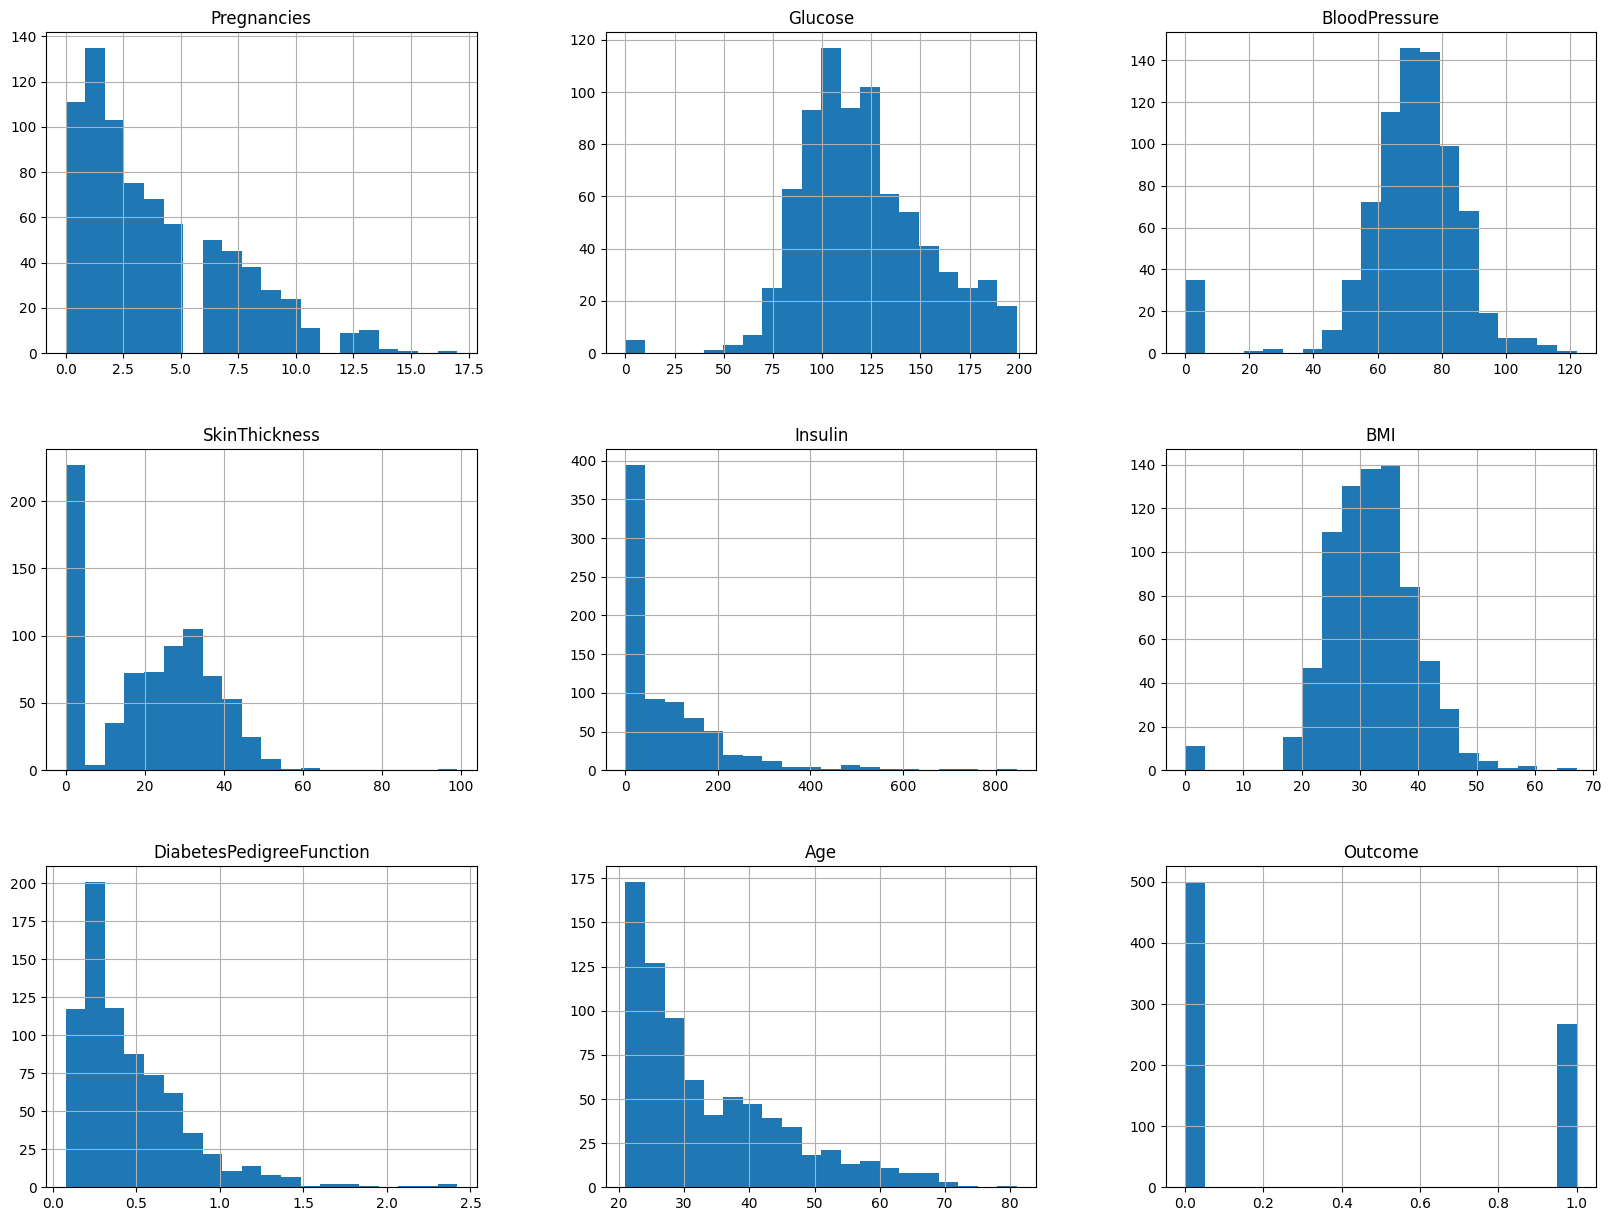

In [9]:
# Histogram of each feature
df.hist(bins=20, figsize=(20, 15))
plt.show()

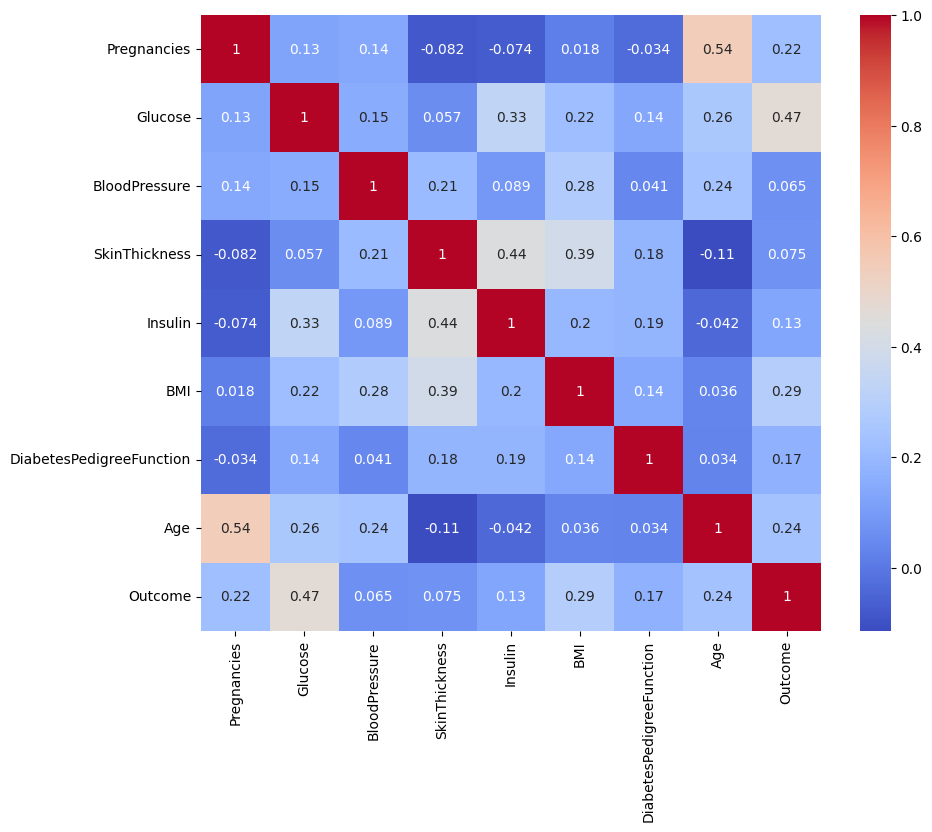

In [10]:
# Correlation heatmap
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

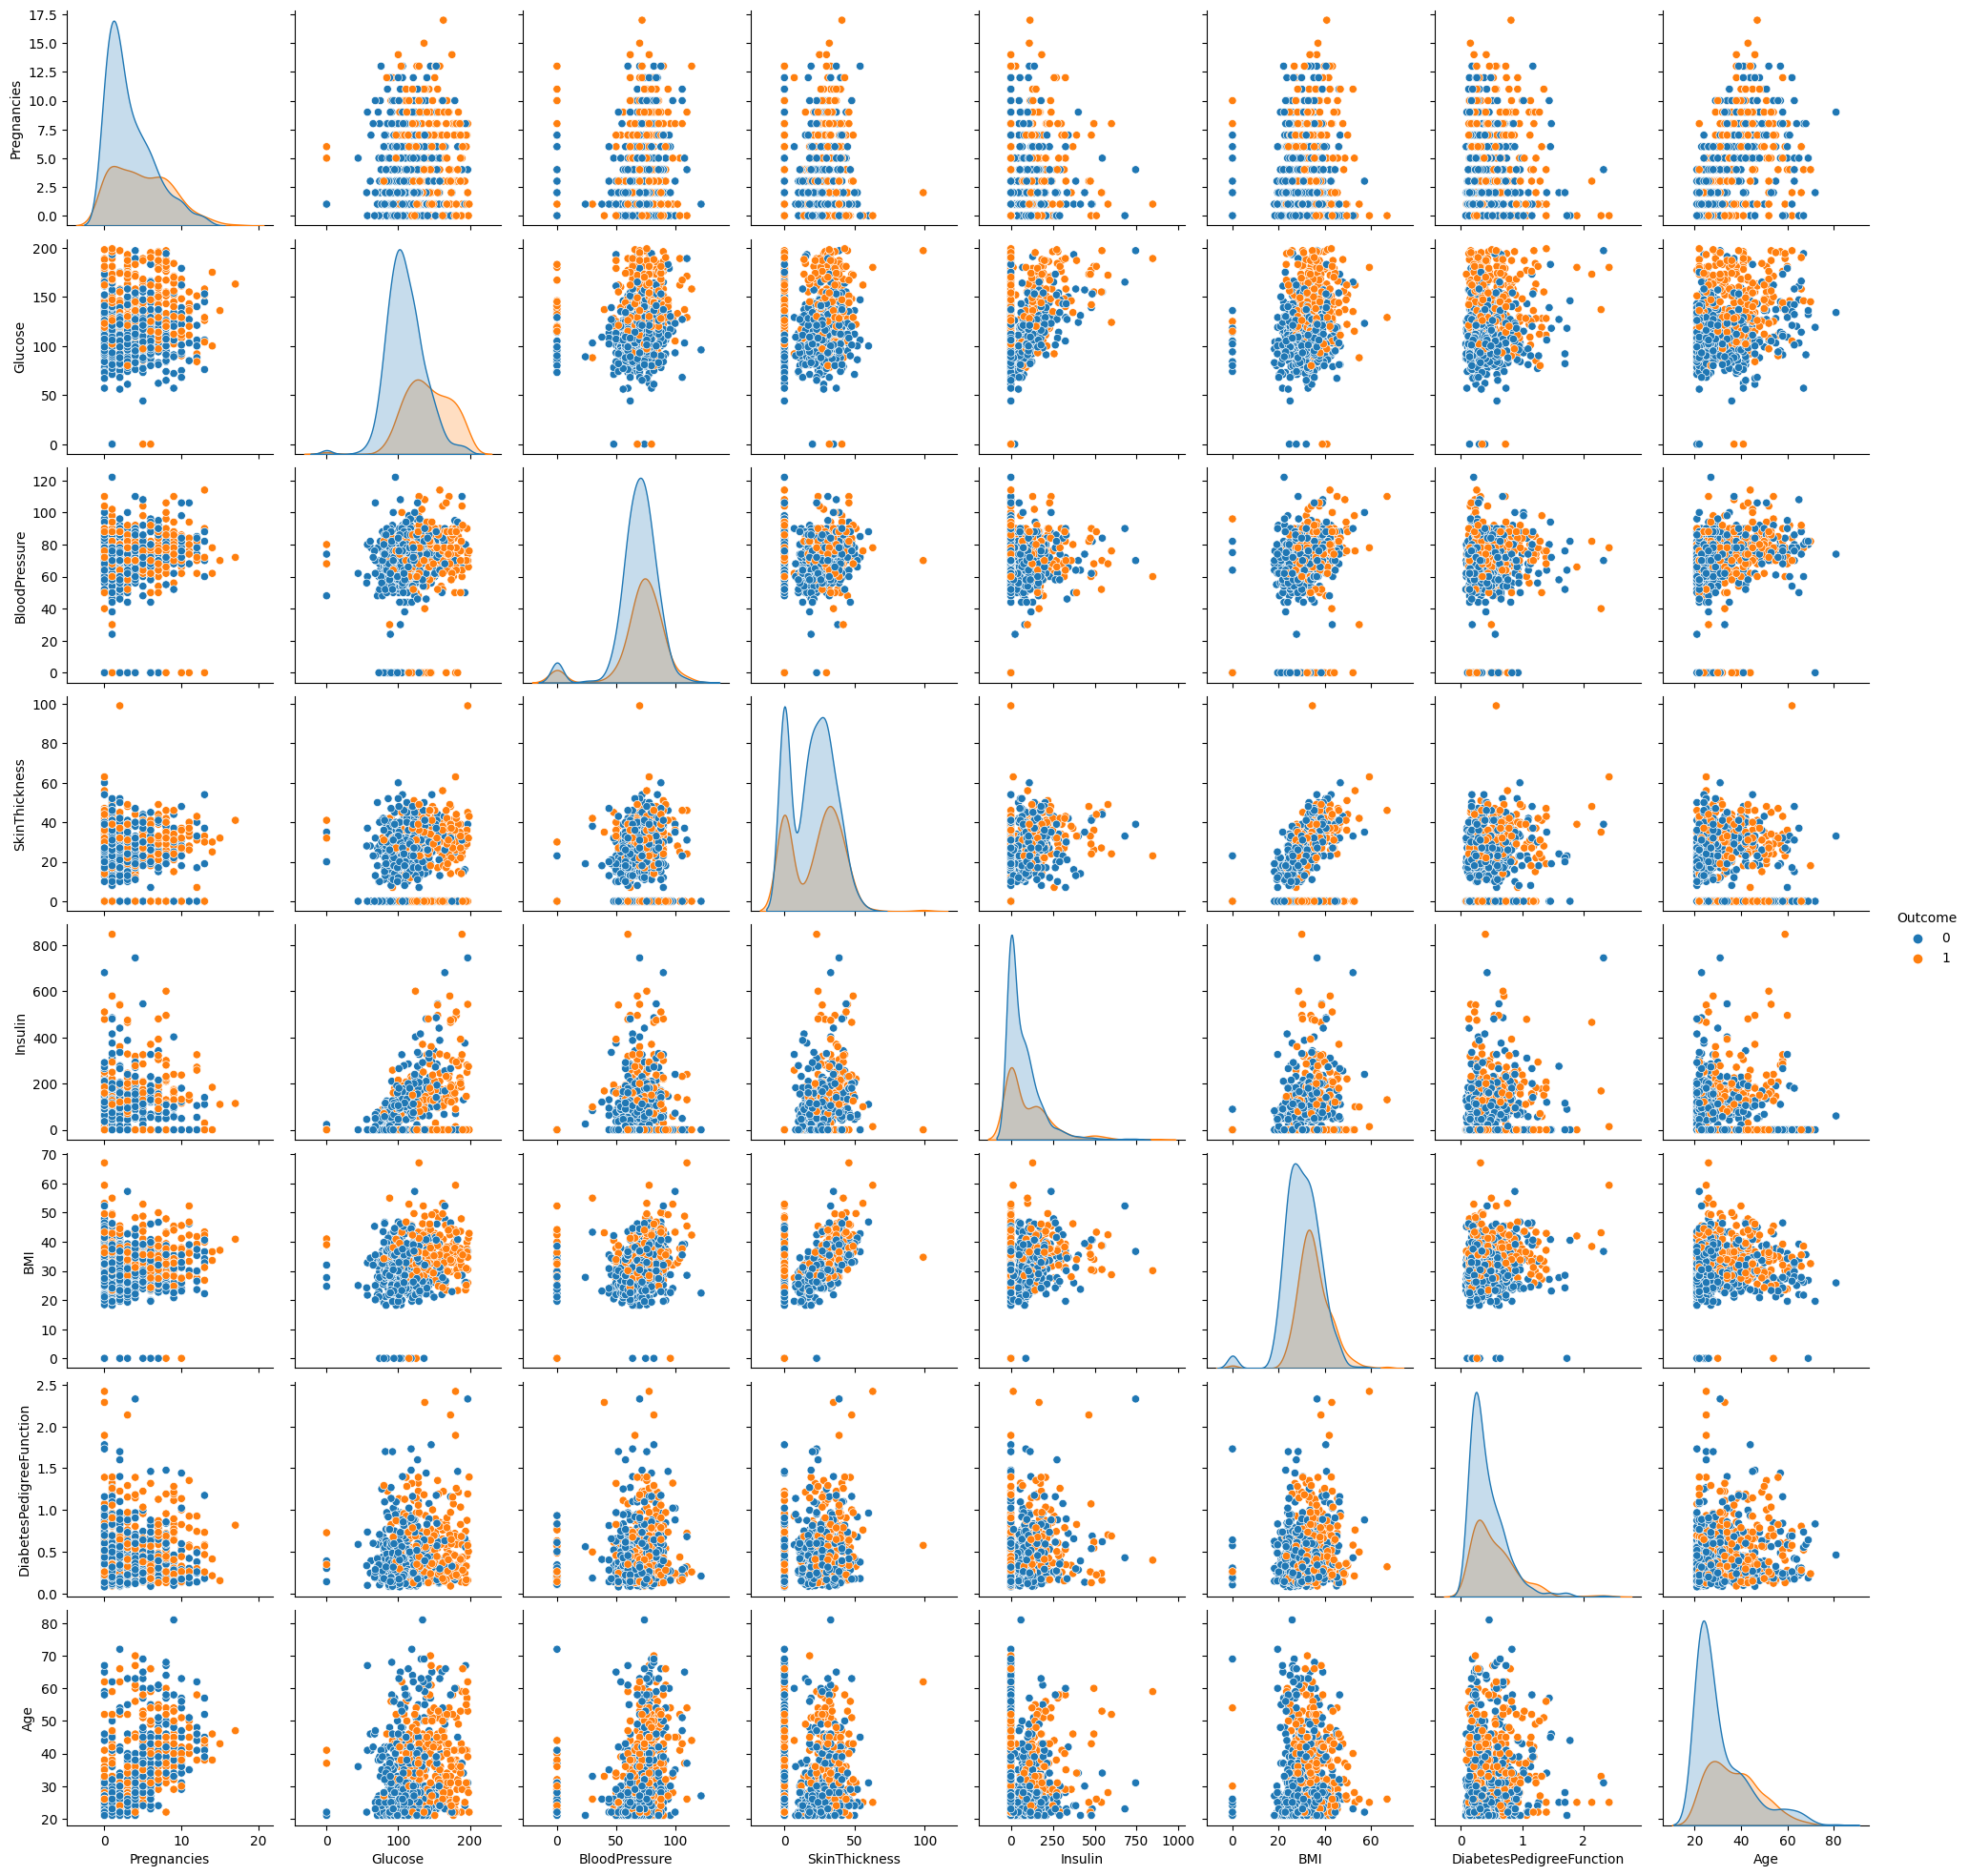

In [11]:
# Pairplot
sns.pairplot(df, hue='Outcome')
plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop(['Outcome', 'AgeCategory'], axis=1))

In [13]:
# Creating a new dataframe with scaled features
df_scaled = pd.DataFrame(scaled_features, columns=df.columns[:-2])
df_scaled['Outcome'] = df['Outcome'].values

In [14]:
df_scaled.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1    -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2     1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3    -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4    -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.468492  1.425995        1  
1                 -0.365061 -0.190672        0  
2                  0.604397 -0.105584        1  
3                 -0.920763 -1.041549        0  
4                  5.484909 -0.020496        1

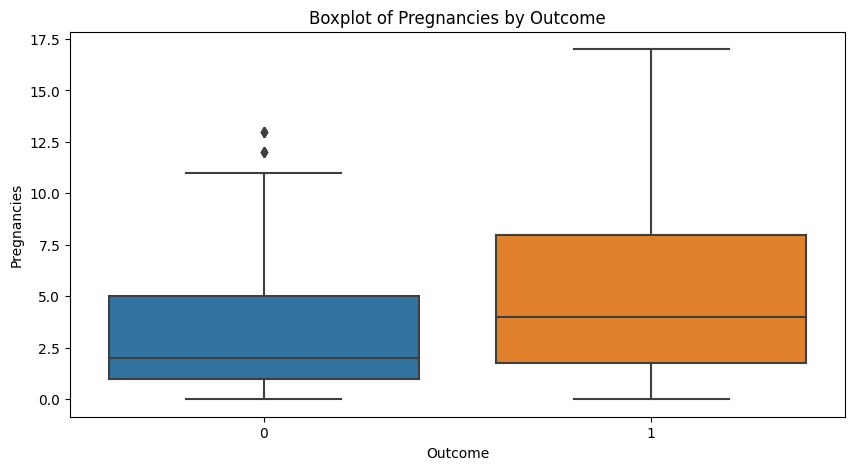

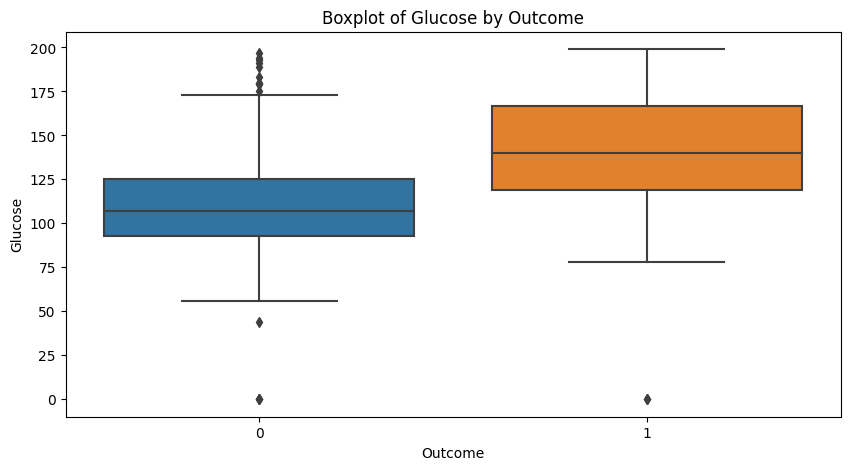

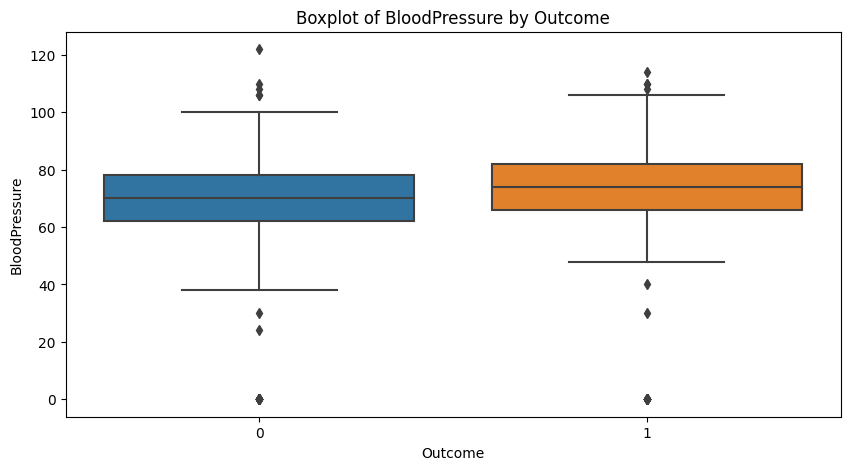

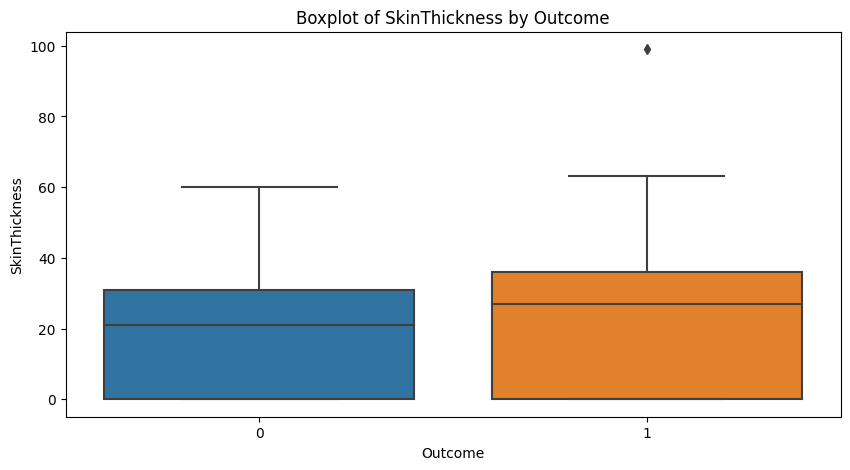

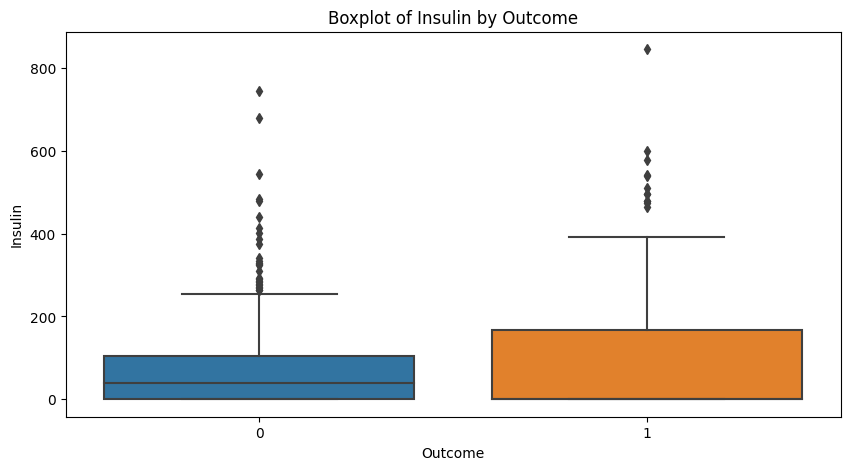

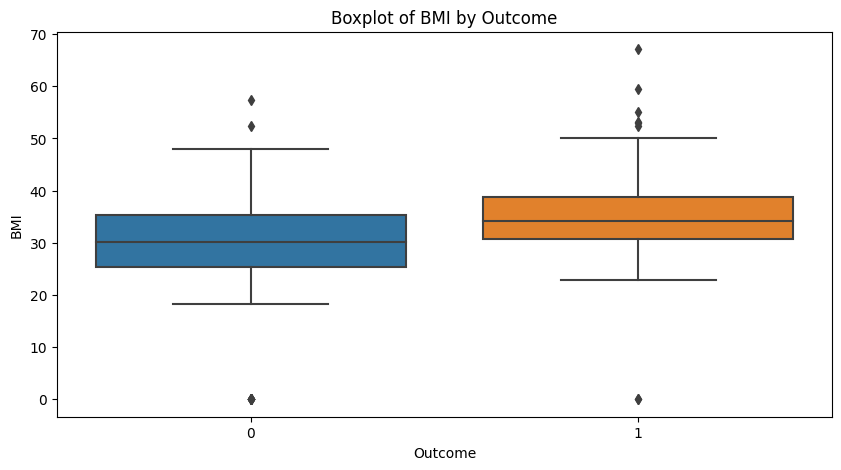

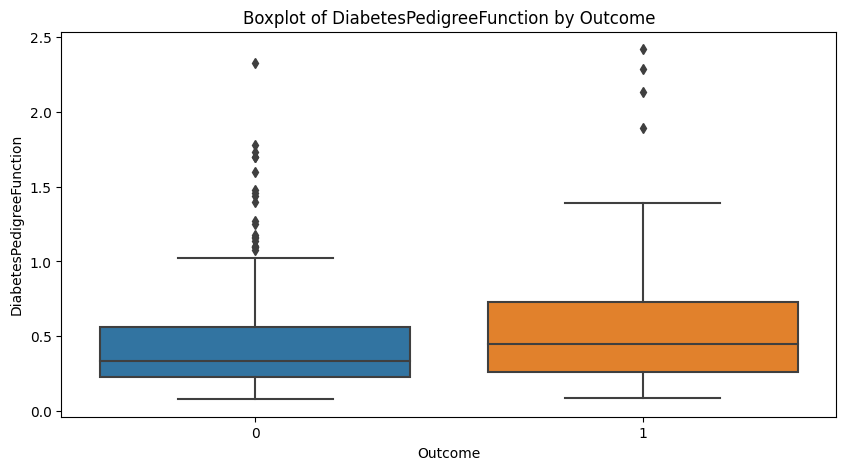

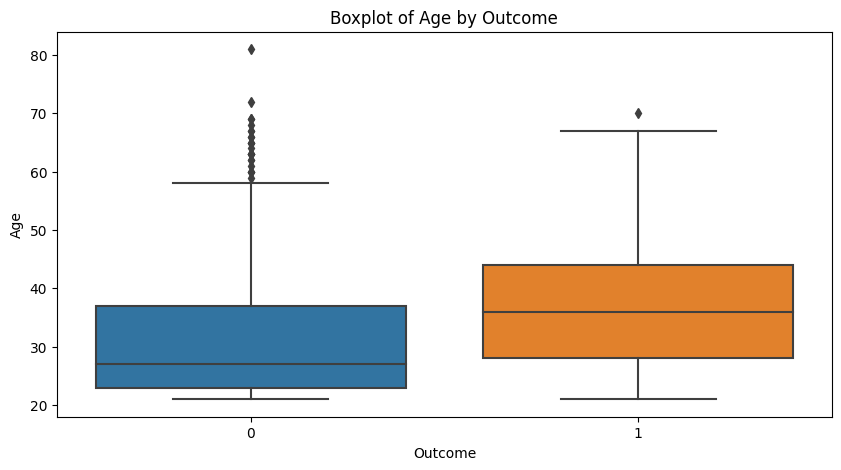

In [15]:
# Boxplot of each feature against Outcome
for column in df.columns[:-2]:  # Exclude 'Outcome' and 'AgeCategory'
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='Outcome', y=column, data=df)
    plt.title(f'Boxplot of {column} by Outcome')
    plt.show()

In [16]:
# Correlation with Outcome
correlation_with_outcome = df[numerical_cols].corr()['Outcome'].sort_values(ascending=False)
correlation_with_outcome

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


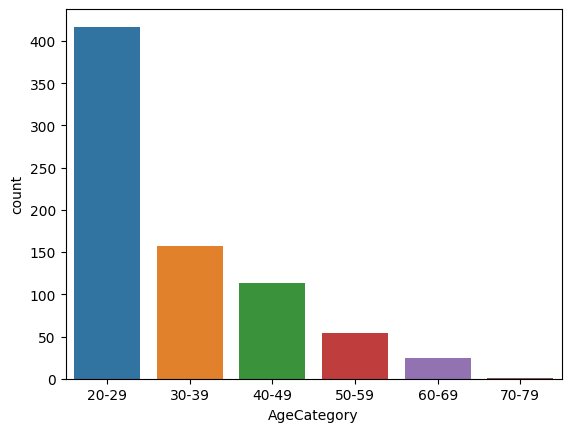

In [17]:
# Distribution of Age Categories
sns.countplot(x='AgeCategory', data=df)
plt.show()

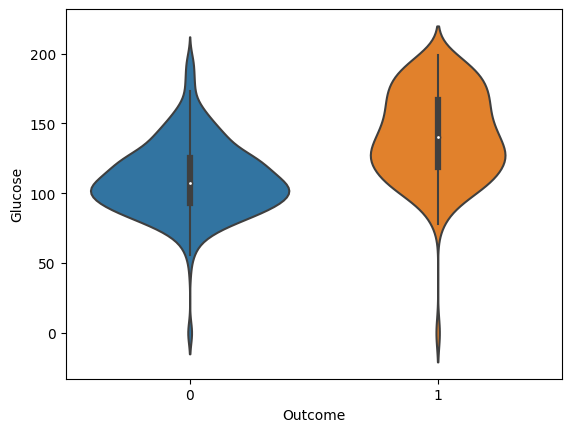

In [18]:
# Violin plot of Glucose levels by Outcome
sns.violinplot(x='Outcome', y='Glucose', data=df)
plt.show()

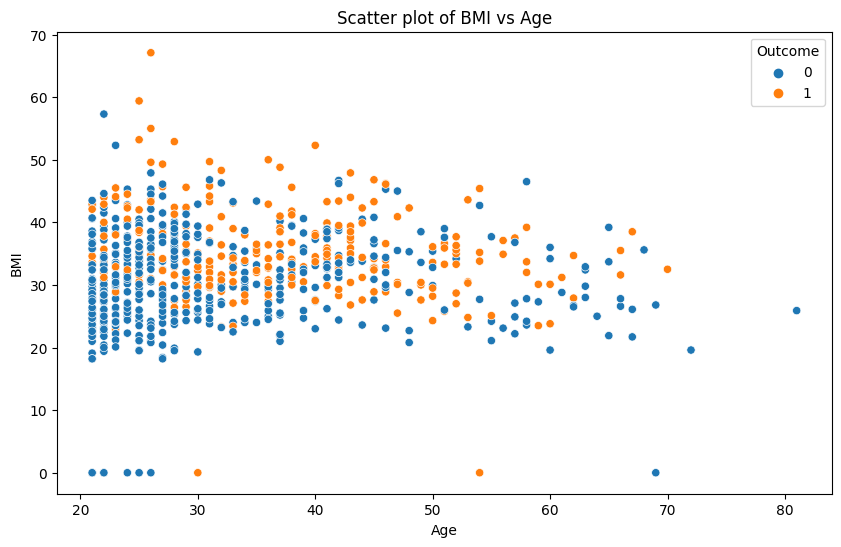

In [19]:
# Scatter plot of BMI and Age
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='BMI', hue='Outcome', data=df)
plt.title('Scatter plot of BMI vs Age')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


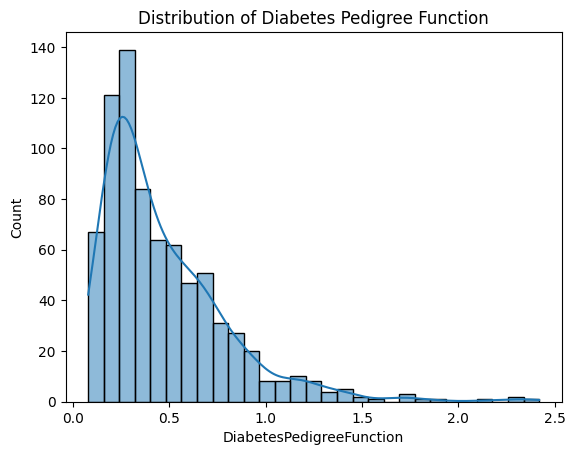

In [20]:
# Distribution of Diabetes Pedigree Function
sns.histplot(df['DiabetesPedigreeFunction'], kde=True)
plt.title('Distribution of Diabetes Pedigree Function')
plt.show()

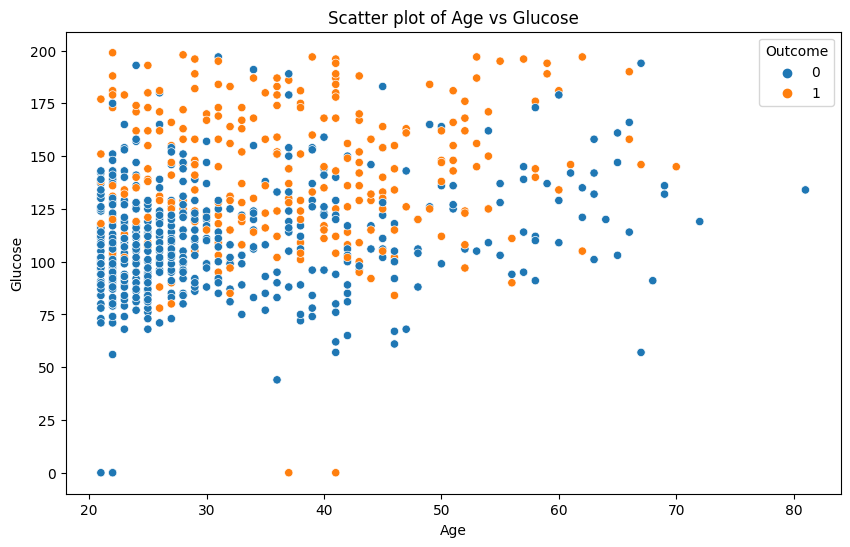

In [21]:
# Scatter plot of Age vs Glucose
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Glucose', hue='Outcome', data=df)
plt.title('Scatter plot of Age vs Glucose')
plt.show()

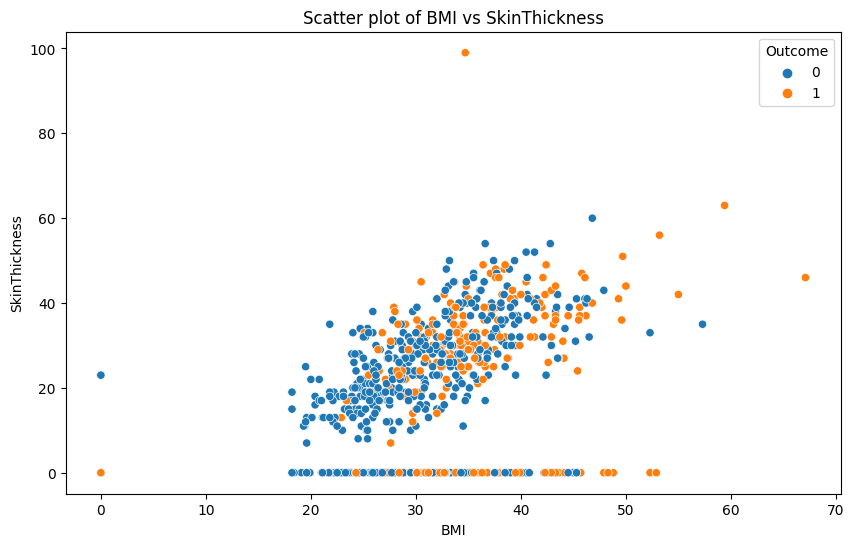

In [22]:
# Scatter plot of BMI vs SkinThickness
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BMI', y='SkinThickness', hue='Outcome', data=df)
plt.title('Scatter plot of BMI vs SkinThickness')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


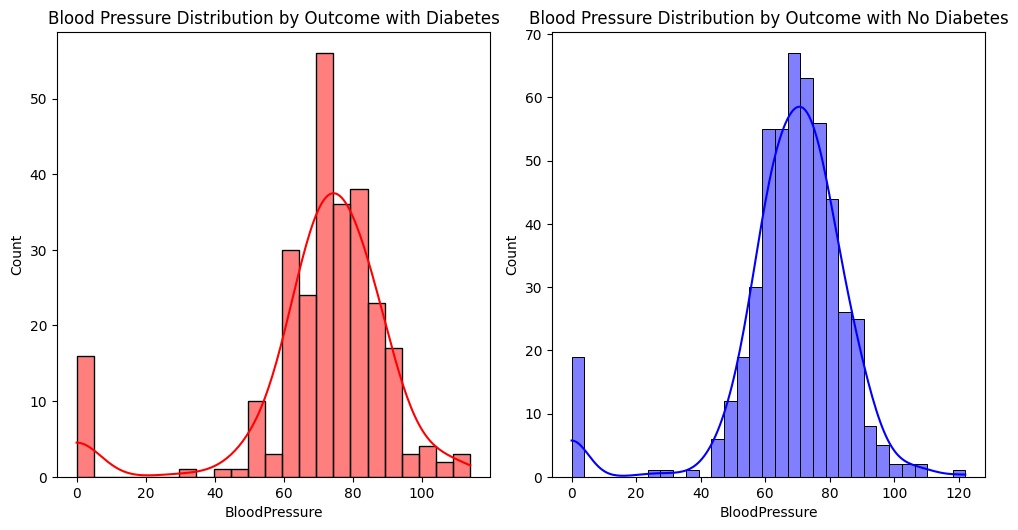

In [23]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
sns.histplot(df[df['Outcome'] == 1]['BloodPressure'], color='r', label='Diabetes', kde=True)
plt.title('Blood Pressure Distribution by Outcome with Diabetes')
plt.subplot(2, 3, 2)
sns.histplot(df[df['Outcome'] == 0]['BloodPressure'], color='b', label='No Diabetes', kde=True)
plt.title('Blood Pressure Distribution by Outcome with No Diabetes')
plt.tight_layout()
plt.show()

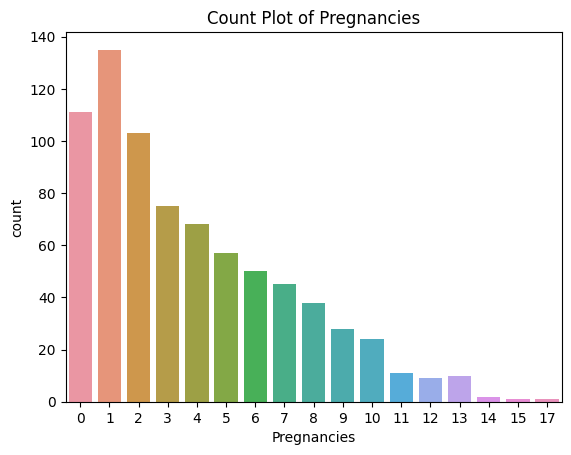

In [24]:
# Count plot of Pregnancies
sns.countplot(x='Pregnancies', data=df)
plt.title('Count Plot of Pregnancies')
plt.show()

/tmp/ipykernel_33/228572231.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_outcome_proportion = df.groupby('AgeCategory')['Outcome'].mean()


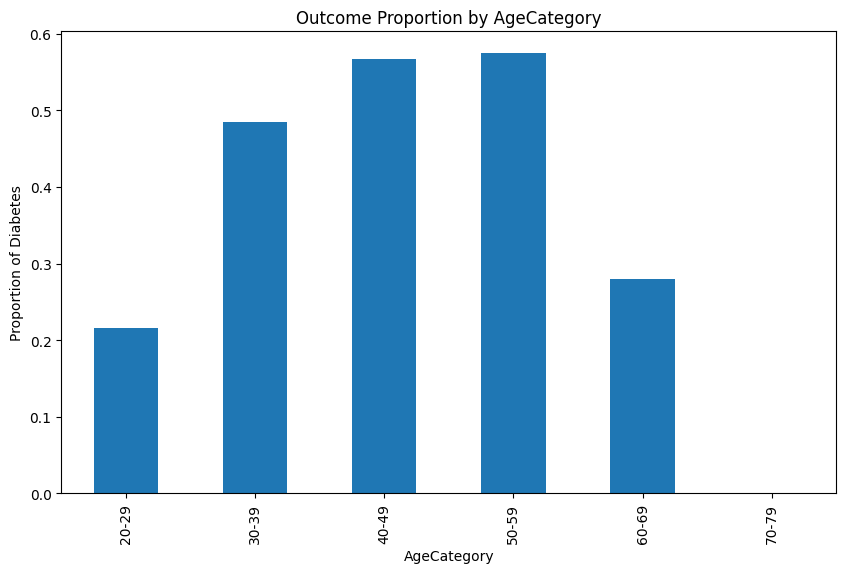

In [25]:
# Outcome proportion by AgeCategory
age_outcome_proportion = df.groupby('AgeCategory')['Outcome'].mean()
age_outcome_proportion.plot(kind='bar', figsize=(10, 6))
plt.title('Outcome Proportion by AgeCategory')
plt.ylabel('Proportion of Diabetes')
plt.show()

/tmp/ipykernel_33/3088486571.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Outcome'] == 1]['BMI'], label='Diabetes', shade=True)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_33/3088486571.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Outcome'] == 0]['BMI'], label='No Diabetes', shade=True)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating in

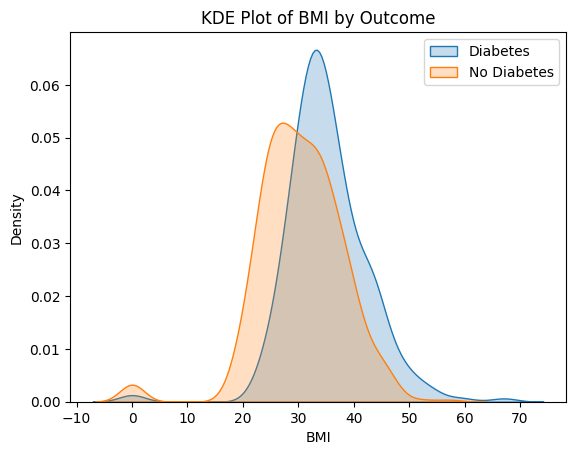

In [26]:
# KDE plot of BMI by Outcome
sns.kdeplot(df[df['Outcome'] == 1]['BMI'], label='Diabetes', shade=True)
sns.kdeplot(df[df['Outcome'] == 0]['BMI'], label='No Diabetes', shade=True)
plt.title('KDE Plot of BMI by Outcome')
plt.legend()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


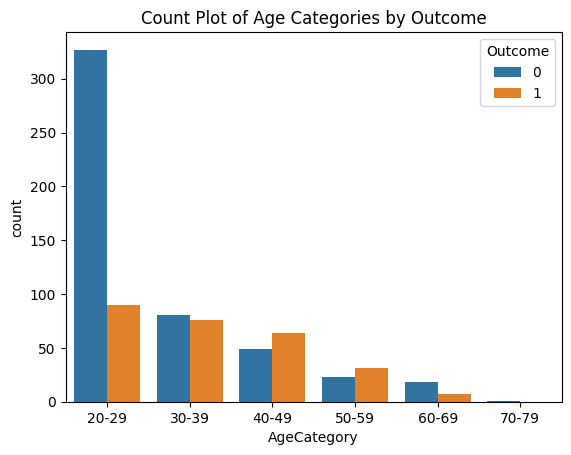

In [27]:
# Count plot of Age Categories by Outcome
sns.countplot(x='AgeCategory', hue='Outcome', data=df)
plt.title('Count Plot of Age Categories by Outcome')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


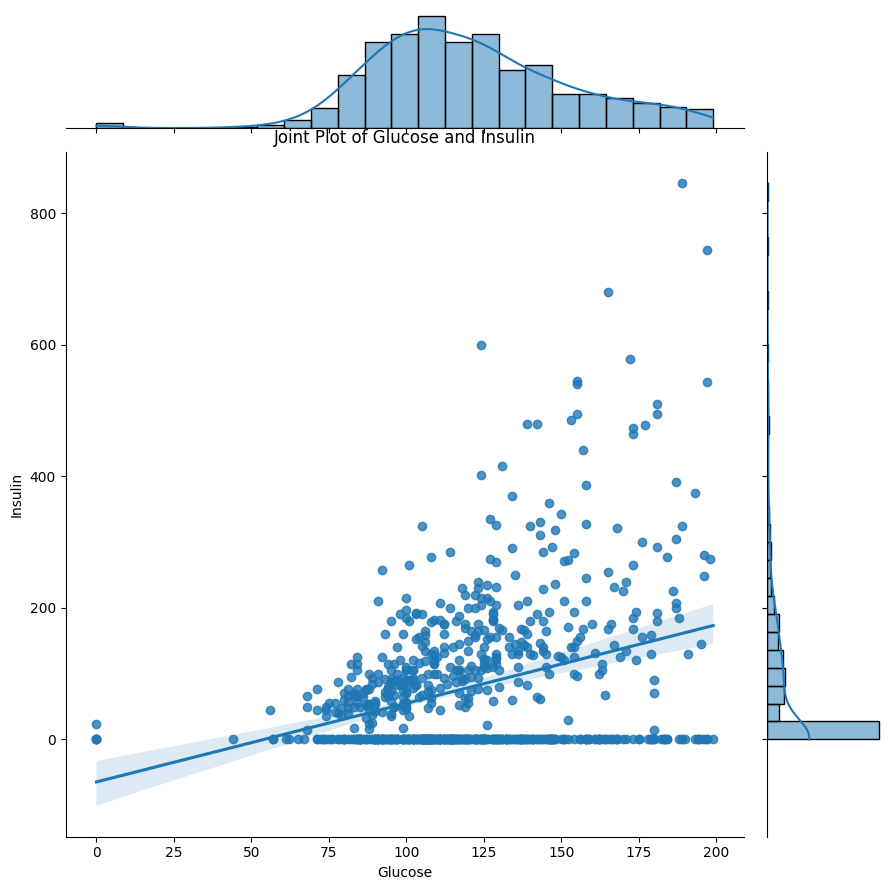

In [28]:
# Joint plot of Glucose and Insulin
sns.jointplot(x='Glucose', y='Insulin', data=df, kind='reg', height=(9))
plt.title('Joint Plot of Glucose and Insulin')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


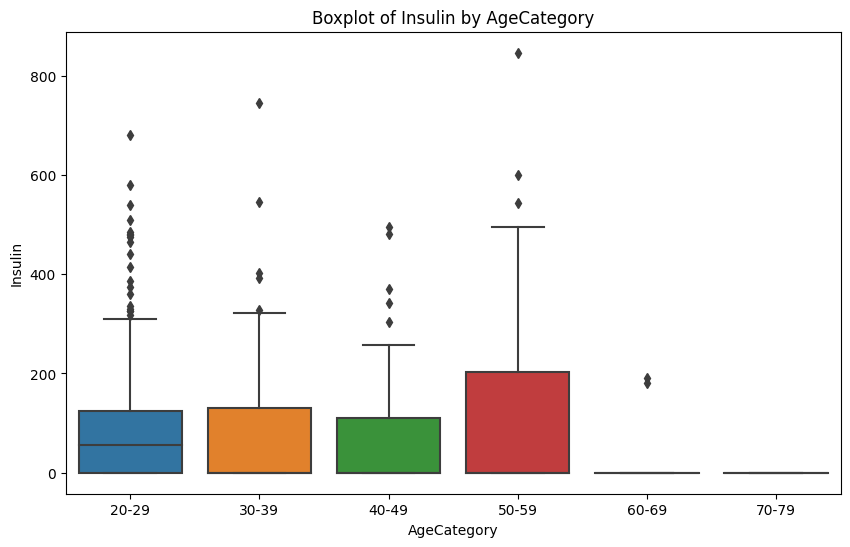

In [29]:
# Boxplot of Insulin by AgeCategory
plt.figure(figsize=(10, 6))
sns.boxplot(x='AgeCategory', y='Insulin', data=df)
plt.title('Boxplot of Insulin by AgeCategory')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


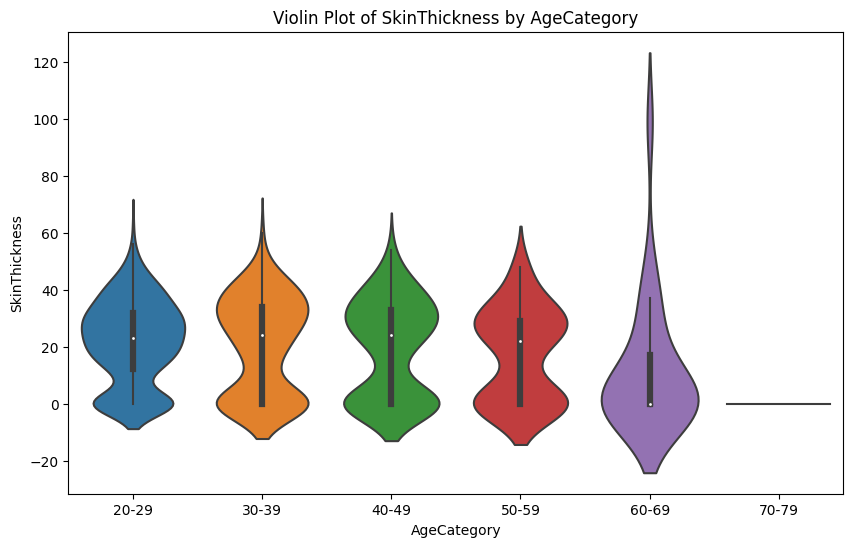

In [30]:
# Violin plot of SkinThickness by AgeCategory
plt.figure(figsize=(10, 6))
sns.violinplot(x='AgeCategory', y='SkinThickness', data=df)
plt.title('Violin Plot of SkinThickness by AgeCategory')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


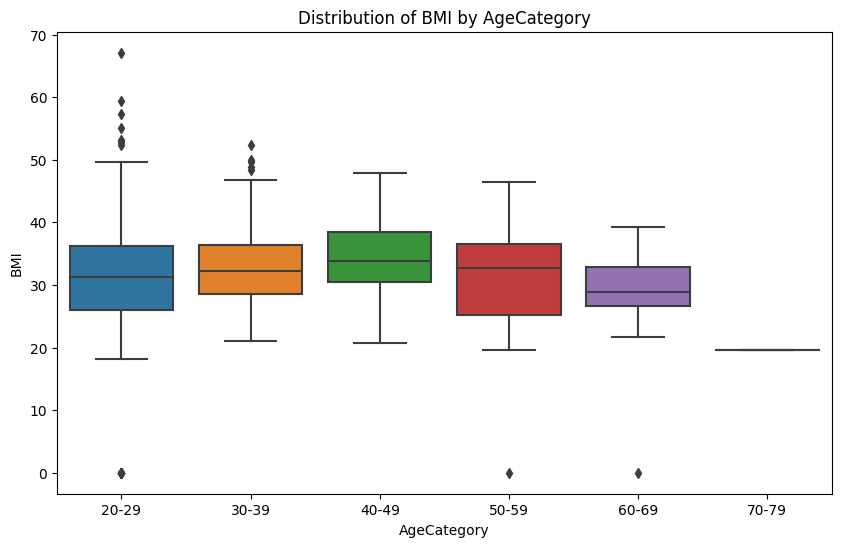

In [31]:
# Distribution of BMI by AgeCategory
plt.figure(figsize=(10, 6))
sns.boxplot(x='AgeCategory', y='BMI', data=df)
plt.title('Distribution of BMI by AgeCategory')
plt.show()

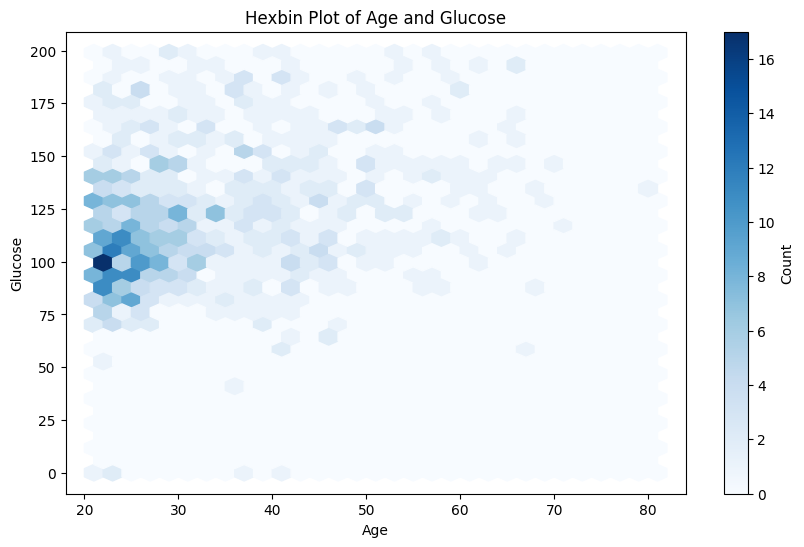

In [32]:
# Hexbin plot of Age and Glucose
plt.figure(figsize=(10, 6))
plt.hexbin(df['Age'], df['Glucose'], gridsize=30, cmap='Blues')
plt.colorbar(label='Count')
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.title('Hexbin Plot of Age and Glucose')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


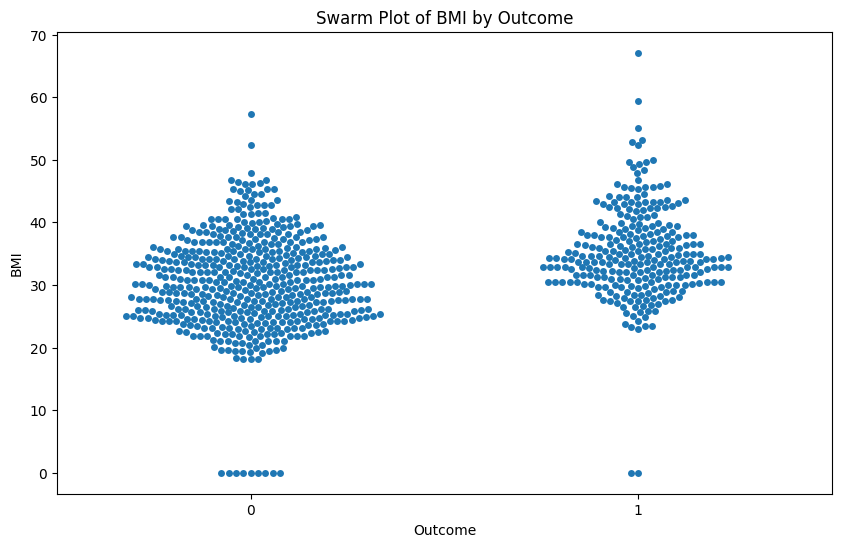

In [33]:
# Swarm plot of BMI by Outcome
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Outcome', y='BMI', data=df)
plt.title('Swarm Plot of BMI by Outcome')
plt.show()

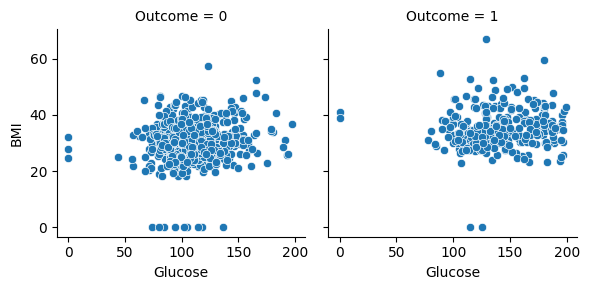

In [34]:
# Facet Grid of Glucose and BMI
g = sns.FacetGrid(df, col='Outcome')
g.map(sns.scatterplot, 'Glucose', 'BMI')
plt.show()

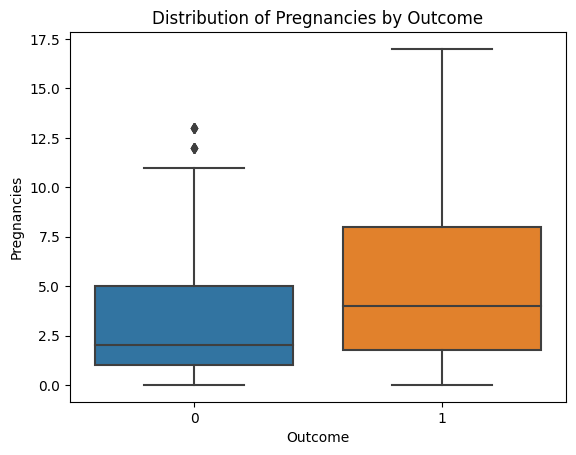

In [35]:
# Distribution of Pregnancies by Outcome
sns.boxplot(x='Outcome', y='Pregnancies', data=df)
plt.title('Distribution of Pregnancies by Outcome')
plt.show()

/tmp/ipykernel_33/1390483287.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Outcome'] == 1]['BloodPressure'], label='Diabetes', shade=True)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_33/1390483287.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Outcome'] == 0]['BloodPressure'], label='No Diabetes', shade=True)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN

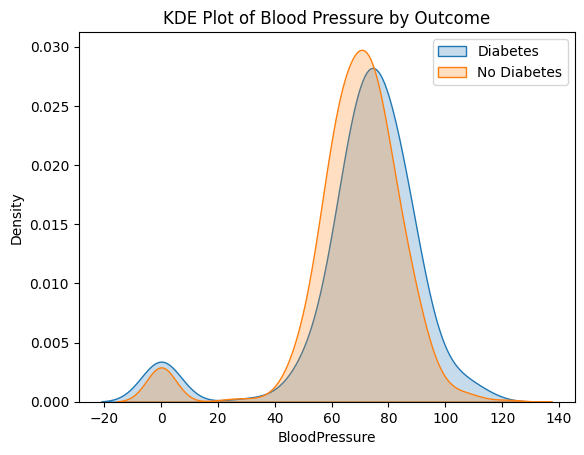

In [36]:
# KDE plot of Blood Pressure by Outcome
sns.kdeplot(df[df['Outcome'] == 1]['BloodPressure'], label='Diabetes', shade=True)
sns.kdeplot(df[df['Outcome'] == 0]['BloodPressure'], label='No Diabetes', shade=True)
plt.title('KDE Plot of Blood Pressure by Outcome')
plt.legend()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


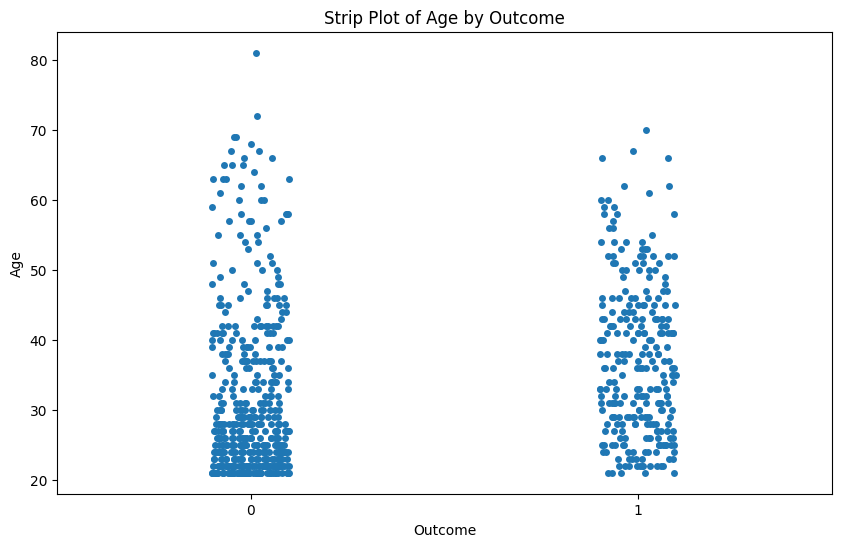

In [37]:
# Strip plot of Age by Outcome
plt.figure(figsize=(10, 6))
sns.stripplot(x='Outcome', y='Age', data=df)
plt.title('Strip Plot of Age by Outcome')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


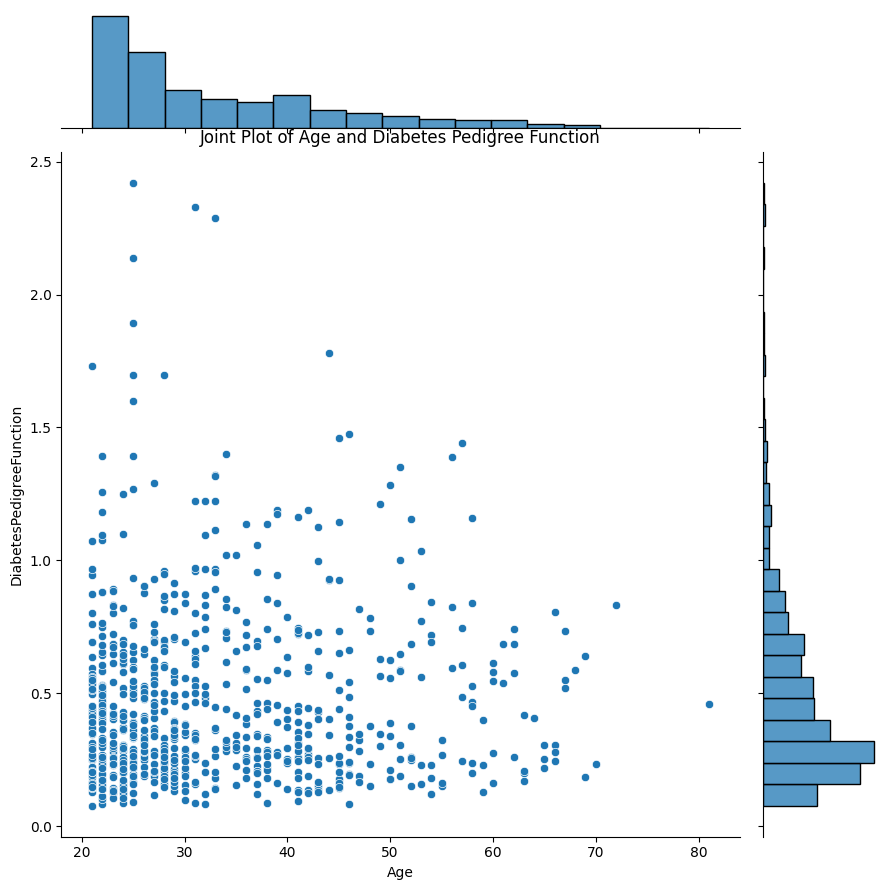

In [38]:
# Joint plot of Age and Diabetes Pedigree Function
sns.jointplot(x='Age', y='DiabetesPedigreeFunction', data=df, kind='scatter', height=(9))
plt.title('Joint Plot of Age and Diabetes Pedigree Function')
plt.show()

### Train Test Split

In [39]:
from sklearn.model_selection import train_test_split
X = df_scaled.drop('Outcome', axis=1)
y = df_scaled['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

## Machine Learning

### logistic regression model 

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [41]:
# Training the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [42]:
# Making predictions
y_pred = model.predict(X_test)

In [43]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [44]:
accuracy

0.7532467532467533

In [45]:
conf_matrix

array([[79, 20],
       [18, 37]])

In [46]:
class_report

'              precision    recall  f1-score   support\n\n           0       0.81      0.80      0.81        99\n           1       0.65      0.67      0.66        55\n\n    accuracy                           0.75       154\n   macro avg       0.73      0.74      0.73       154\nweighted avg       0.76      0.75      0.75       154\n'

### Decision Tree Classifier

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
# Training the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [49]:
# Making predictions
dt_y_pred = dt_model.predict(X_test)

In [50]:
# Evaluating the model
dt_accuracy = accuracy_score(y_test, dt_y_pred)
dt_conf_matrix = confusion_matrix(y_test, dt_y_pred)
dt_class_report = classification_report(y_test, dt_y_pred)

In [51]:
dt_accuracy, dt_conf_matrix, dt_class_report

(0.7467532467532467,
 array([[75, 24],
        [15, 40]]),
 '              precision    recall  f1-score   support\n\n           0       0.83      0.76      0.79        99\n           1       0.62      0.73      0.67        55\n\n    accuracy                           0.75       154\n   macro avg       0.73      0.74      0.73       154\nweighted avg       0.76      0.75      0.75       154\n')

### Random Forest Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
# Training the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [54]:
# Making predictions
rf_y_pred = rf_model.predict(X_test)

In [55]:
# Evaluating the model
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)
rf_class_report = classification_report(y_test, rf_y_pred)

In [56]:
rf_accuracy, rf_conf_matrix, rf_class_report

(0.7272727272727273,
 array([[78, 21],
        [21, 34]]),
 '              precision    recall  f1-score   support\n\n           0       0.79      0.79      0.79        99\n           1       0.62      0.62      0.62        55\n\n    accuracy                           0.73       154\n   macro avg       0.70      0.70      0.70       154\nweighted avg       0.73      0.73      0.73       154\n')

### Support Vector Machine (SVM) Classifier

In [57]:
from sklearn.svm import SVC

In [58]:
# Training the model
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [59]:
# Making predictions
svm_y_pred = svm_model.predict(X_test)

In [60]:
# Evaluating the model
svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_conf_matrix = confusion_matrix(y_test, svm_y_pred)
svm_class_report = classification_report(y_test, svm_y_pred)

svm_accuracy, svm_conf_matrix, svm_class_report

(0.7272727272727273,
 array([[81, 18],
        [24, 31]]),
 '              precision    recall  f1-score   support\n\n           0       0.77      0.82      0.79        99\n           1       0.63      0.56      0.60        55\n\n    accuracy                           0.73       154\n   macro avg       0.70      0.69      0.70       154\nweighted avg       0.72      0.73      0.72       154\n')

### K-Nearest Neighbors (KNN) Classifier

In [61]:
from sklearn.neighbors import KNeighborsClassifier

In [62]:
# Training the model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [63]:
# Making predictions
knn_y_pred = knn_model.predict(X_test)

In [64]:
# Evaluating the model
knn_accuracy = accuracy_score(y_test, knn_y_pred)
knn_conf_matrix = confusion_matrix(y_test, knn_y_pred)
knn_class_report = classification_report(y_test, knn_y_pred)

knn_accuracy, knn_conf_matrix, knn_class_report

(0.6883116883116883,
 array([[79, 20],
        [28, 27]]),
 '              precision    recall  f1-score   support\n\n           0       0.74      0.80      0.77        99\n           1       0.57      0.49      0.53        55\n\n    accuracy                           0.69       154\n   macro avg       0.66      0.64      0.65       154\nweighted avg       0.68      0.69      0.68       154\n')

### Gradient Boosting Classifier

In [65]:
from sklearn.ensemble import GradientBoostingClassifier

In [66]:
# Training the model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [67]:
# Making predictions
gb_y_pred = gb_model.predict(X_test)

In [68]:
# Evaluating the model
gb_accuracy = accuracy_score(y_test, gb_y_pred)
gb_conf_matrix = confusion_matrix(y_test, gb_y_pred)
gb_class_report = classification_report(y_test, gb_y_pred)

gb_accuracy, gb_conf_matrix, gb_class_report

(0.7402597402597403,
 array([[77, 22],
        [18, 37]]),
 '              precision    recall  f1-score   support\n\n           0       0.81      0.78      0.79        99\n           1       0.63      0.67      0.65        55\n\n    accuracy                           0.74       154\n   macro avg       0.72      0.73      0.72       154\nweighted avg       0.75      0.74      0.74       154\n')

### AdaBoost Classifier

In [69]:
from sklearn.ensemble import AdaBoostClassifier

In [70]:
# Training the model
ab_model = AdaBoostClassifier(random_state=42)
ab_model.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [71]:
# Making predictions
ab_y_pred = ab_model.predict(X_test)

In [72]:
# Evaluating the model
ab_accuracy = accuracy_score(y_test, ab_y_pred)
ab_conf_matrix = confusion_matrix(y_test, ab_y_pred)
ab_class_report = classification_report(y_test, ab_y_pred)

ab_accuracy, ab_conf_matrix, ab_class_report

(0.7337662337662337,
 array([[78, 21],
        [20, 35]]),
 '              precision    recall  f1-score   support\n\n           0       0.80      0.79      0.79        99\n           1       0.62      0.64      0.63        55\n\n    accuracy                           0.73       154\n   macro avg       0.71      0.71      0.71       154\nweighted avg       0.73      0.73      0.73       154\n')

### Hyperparameter Tuning using GridSearchCV for RandomForest

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
# Hyperparameter tuning for RandomForest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


In [ ]:
best_rf_model = grid_search.best_estimator_
best_rf_model

### Cross-Validation Score for Logistic Regression

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# Cross-validation score for Logistic Regression
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
cv_scores.mean()

### Feature Importance using RandomForest

In [101]:
# Feature importance using RandomForest
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df.sort_values(by='Importance', ascending=False)

Feature  Importance
1                   Glucose    0.258864
5                       BMI    0.169984
7                       Age    0.140931
6  DiabetesPedigreeFunction    0.123768
2             BloodPressure    0.088134
0               Pregnancies    0.076551
4                   Insulin    0.076122
3             SkinThickness    0.065646

### ROC Curve for Logistic Regression

In [102]:
from sklearn.metrics import roc_curve, auc

In [103]:
# ROC Curve for Logistic Regression
y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

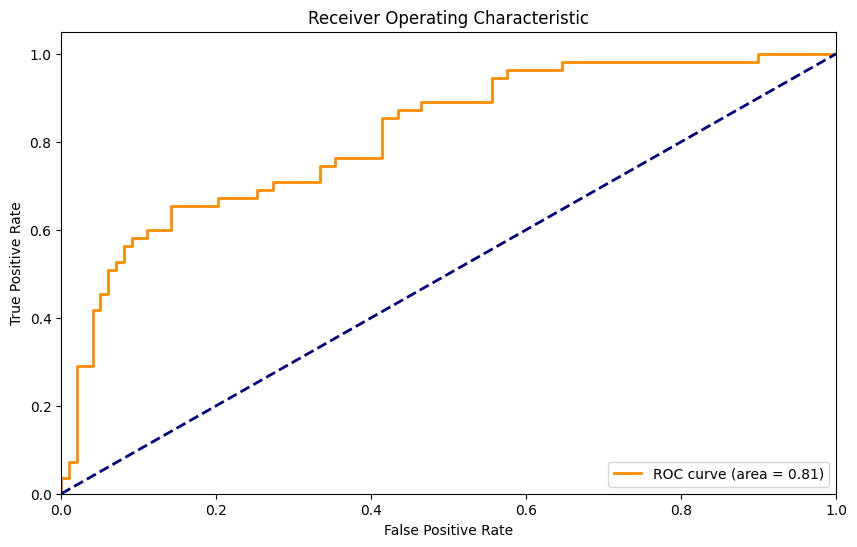

In [104]:
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

### Precision-Recall Curve

In [105]:
from sklearn.metrics import precision_recall_curve

In [106]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

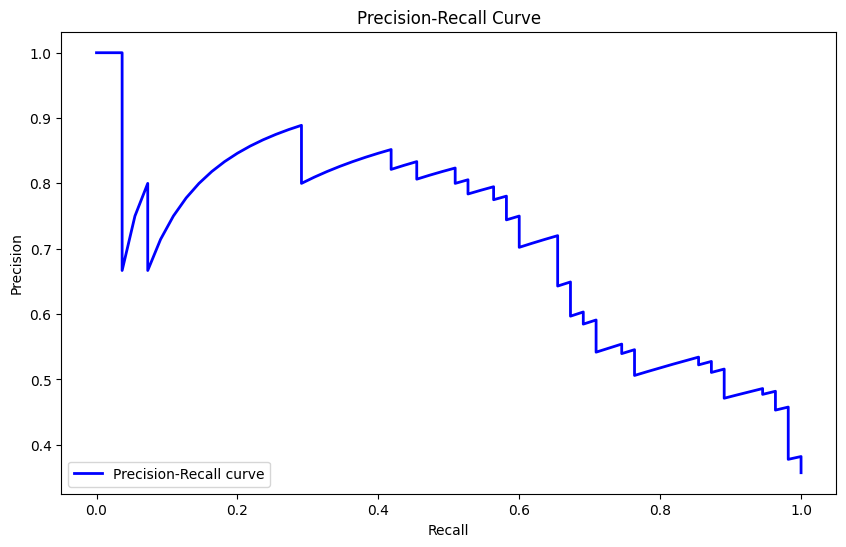

In [107]:
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, lw=2, color='b', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

### Confusion Matrix Heatmap

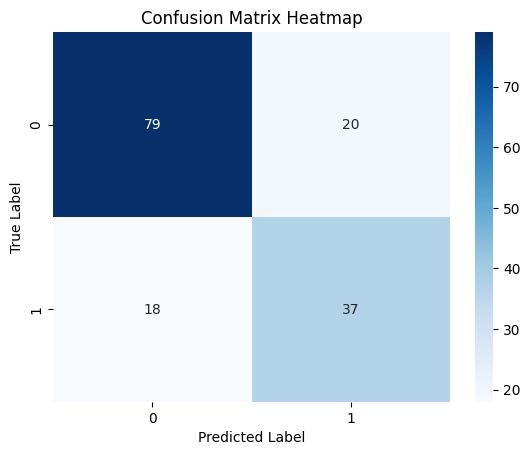

In [108]:
# Confusion Matrix Heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Learning Curve for RandomForest

In [109]:
from sklearn.model_selection import learning_curve

In [110]:
# Learning curve for RandomForest
train_sizes, train_scores, test_scores = learning_curve(rf_model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

In [111]:
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

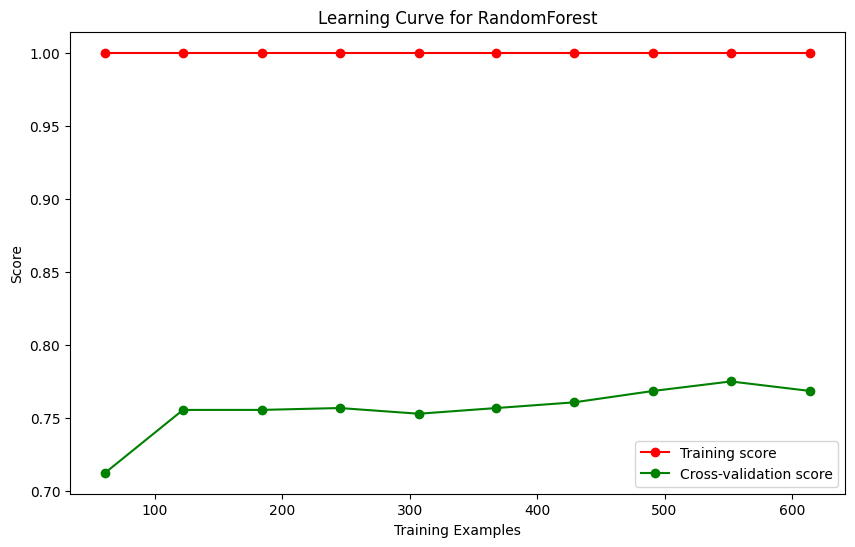

In [112]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.title('Learning Curve for RandomForest')
plt.legend(loc='best')
plt.show()

### Model Evaluation with Stratified K-Fold Cross-Validation

In [113]:
from sklearn.model_selection import StratifiedKFold

In [114]:
# Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5)
skf_accuracy_scores = []

In [115]:
for train_index, test_index in skf.split(X, y):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train_fold, y_train_fold)
    y_pred_fold = model.predict(X_test_fold)
    skf_accuracy_scores.append(accuracy_score(y_test_fold, y_pred_fold))

np.mean(skf_accuracy_scores)

0.7708853238265002

### Feature Selection using Recursive Feature Elimination (RFE)

In [116]:
from sklearn.feature_selection import RFE

In [117]:
# Recursive Feature Elimination
rfe_model = RFE(estimator=model, n_features_to_select=5)
rfe_model.fit(X, y)

RFE(estimator=LogisticRegression(), n_features_to_select=5)

In [118]:
# Selected features
selected_features = X.columns[rfe_model.support_]
selected_features

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'BMI',
       'DiabetesPedigreeFunction'],
      dtype='object')

 ### Model Evaluation using Precision and Recall

In [119]:
from sklearn.metrics import precision_score, recall_score

In [120]:
# Model evaluation using precision and recall
precision_score = precision_score(y_test, y_pred)
recall_score = recall_score(y_test, y_pred)

precision_score, recall_score

(0.6491228070175439, 0.6727272727272727)

### Hyperparameter Tuning using RandomizedSearchCV for SVM

In [121]:
from sklearn.model_selection import RandomizedSearchCV

In [122]:
# Hyperparameter tuning for SVM using RandomizedSearchCV
param_dist = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf']
}

In [123]:
random_search = RandomizedSearchCV(estimator=svm_model, param_distributions=param_dist, n_iter=50, cv=3, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 32 is smaller than n_iter=50. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=SVC(), n_iter=50, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'gamma': [1, 0.1, 0.01, 0.001],
                                        'kernel': ['linear', 'rbf']},
                   random_state=42)

In [124]:
best_svm_model = random_search.best_estimator_
best_svm_model

SVC(C=100, gamma=0.001)

### Implementing Bagging Classifier

In [125]:
from sklearn.ensemble import BaggingClassifier

In [126]:
# Training the model
bagging_model = BaggingClassifier(base_estimator=model, n_estimators=50, random_state=42)
bagging_model.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=50,
                  random_state=42)

In [127]:
# Making predictions
bagging_y_pred = bagging_model.predict(X_test)

In [128]:
# Evaluating the model
bagging_accuracy = accuracy_score(y_test, bagging_y_pred)
bagging_conf_matrix = confusion_matrix(y_test, bagging_y_pred)
bagging_class_report = classification_report(y_test, bagging_y_pred)

In [129]:
bagging_accuracy, bagging_conf_matrix, bagging_class_report

(0.7532467532467533,
 array([[79, 20],
        [18, 37]]),
 '              precision    recall  f1-score   support\n\n           0       0.81      0.80      0.81        99\n           1       0.65      0.67      0.66        55\n\n    accuracy                           0.75       154\n   macro avg       0.73      0.74      0.73       154\nweighted avg       0.76      0.75      0.75       154\n')

### Implementing Voting Classifier

In [130]:
from sklearn.ensemble import VotingClassifier

In [131]:
# Defining the models
log_clf = LogisticRegression(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
svc_clf = SVC(probability=True)

In [132]:
# Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('lr', log_clf),
    ('rf', rf_clf),
    ('svc', svc_clf)
], voting='soft')

In [133]:
# Training the model
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(probability=True))],
                 voting='soft')

In [134]:
# Making predictions
voting_y_pred = voting_clf.predict(X_test)

In [135]:
# Evaluating the model
voting_accuracy = accuracy_score(y_test, voting_y_pred)
voting_conf_matrix = confusion_matrix(y_test, voting_y_pred)
voting_class_report = classification_report(y_test, voting_y_pred)

voting_accuracy, voting_conf_matrix, voting_class_report

(0.7727272727272727,
 array([[83, 16],
        [19, 36]]),
 '              precision    recall  f1-score   support\n\n           0       0.81      0.84      0.83        99\n           1       0.69      0.65      0.67        55\n\n    accuracy                           0.77       154\n   macro avg       0.75      0.75      0.75       154\nweighted avg       0.77      0.77      0.77       154\n')

### Implementing Stacking Classifier


In [136]:
from sklearn.ensemble import StackingClassifier

In [137]:
# Defining the models
estimators = [
    ('lr', LogisticRegression(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42))
]
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=SVC())

In [138]:
# Training the model
stacking_clf.fit(X_train, y_train)

StackingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                               ('rf', RandomForestClassifier(random_state=42))],
                   final_estimator=SVC())

In [139]:
# Making predictions
stacking_y_pred = stacking_clf.predict(X_test)

In [140]:
# Evaluating the model
stacking_accuracy = accuracy_score(y_test, stacking_y_pred)
stacking_conf_matrix = confusion_matrix(y_test, stacking_y_pred)
stacking_class_report = classification_report(y_test, stacking_y_pred)

stacking_accuracy, stacking_conf_matrix, stacking_class_report

(0.7467532467532467,
 array([[78, 21],
        [18, 37]]),
 '              precision    recall  f1-score   support\n\n           0       0.81      0.79      0.80        99\n           1       0.64      0.67      0.65        55\n\n    accuracy                           0.75       154\n   macro avg       0.73      0.73      0.73       154\nweighted avg       0.75      0.75      0.75       154\n')

### Implementing XGBoost Classifier


In [141]:
import xgboost as xgb

In [142]:
# Training the model
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [143]:
# Making predictions
xgb_y_pred = xgb_model.predict(X_test)

In [144]:
# Evaluating the model
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
xgb_conf_matrix = confusion_matrix(y_test, xgb_y_pred)
xgb_class_report = classification_report(y_test, xgb_y_pred)

xgb_accuracy, xgb_conf_matrix, xgb_class_report

(0.7077922077922078,
 array([[73, 26],
        [19, 36]]),
 '              precision    recall  f1-score   support\n\n           0       0.79      0.74      0.76        99\n           1       0.58      0.65      0.62        55\n\n    accuracy                           0.71       154\n   macro avg       0.69      0.70      0.69       154\nweighted avg       0.72      0.71      0.71       154\n')

### Hyperparameter Tuning using GridSearchCV for XGBoost

In [145]:
# Hyperparameter tuning for XGBoost
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]
}

In [146]:
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.2s
[CV] END max_de

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [147]:
best_xgb_model = grid_search.best_estimator_
best_xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

### Model Evaluation with F1-Score

In [148]:
from sklearn.metrics import f1_score
# Model evaluation using F1-score
f1 = f1_score(y_test, y_pred)
f1

0.6607142857142858

### Implementing LightGBM Classifier

In [149]:
import lightgbm as lgb

In [150]:
# Training the model
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 213, number of negative: 401
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001368 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 669
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.346906 -> initscore=-0.632669
[LightGBM] [Info] Start training from score -0.632669
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

LGBMClassifier(random_state=42)

In [151]:
# Making predictions
lgb_y_pred = lgb_model.predict(X_test)

In [152]:
# Evaluating the model
lgb_accuracy = accuracy_score(y_test, lgb_y_pred)
lgb_conf_matrix = confusion_matrix(y_test, lgb_y_pred)
lgb_class_report = classification_report(y_test, lgb_y_pred)

lgb_accuracy, lgb_conf_matrix, lgb_class_report

(0.7012987012987013,
 array([[72, 27],
        [19, 36]]),
 '              precision    recall  f1-score   support\n\n           0       0.79      0.73      0.76        99\n           1       0.57      0.65      0.61        55\n\n    accuracy                           0.70       154\n   macro avg       0.68      0.69      0.68       154\nweighted avg       0.71      0.70      0.71       154\n')

### Implementing CatBoost Classifier

In [153]:
from catboost import CatBoostClassifier

In [154]:
# Training the model
cat_model = CatBoostClassifier(random_state=42, verbose=0)
cat_model.fit(X_train, y_train)

In [155]:
# Making predictions
cat_y_pred = cat_model.predict(X_test)

In [156]:
# Evaluating the model
cat_accuracy = accuracy_score(y_test, cat_y_pred)
cat_conf_matrix = confusion_matrix(y_test, cat_y_pred)
cat_class_report = classification_report(y_test, cat_y_pred)

cat_accuracy, cat_conf_matrix, cat_class_report

(0.7532467532467533,
 array([[79, 20],
        [18, 37]]),
 '              precision    recall  f1-score   support\n\n           0       0.81      0.80      0.81        99\n           1       0.65      0.67      0.66        55\n\n    accuracy                           0.75       154\n   macro avg       0.73      0.74      0.73       154\nweighted avg       0.76      0.75      0.75       154\n')

### Feature Importance using XGBoost


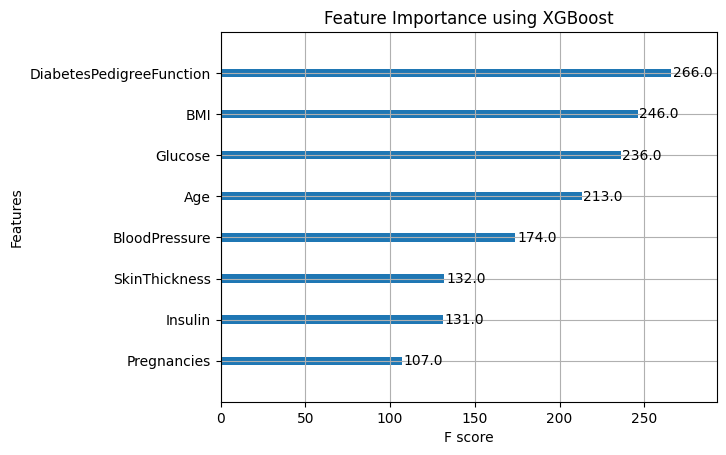

In [157]:
# Feature importance using XGBoost
xgb.plot_importance(xgb_model)
plt.title('Feature Importance using XGBoost')
plt.show()

### Implementing Neural Network using Keras

In [158]:
from keras.models import Sequential
from keras.layers import Dense

2024-06-20 15:16:23.771401: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-20 15:16:23.771537: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-20 15:16:23.924621: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [159]:
# Defining the model
nn_model = Sequential()
nn_model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))
nn_model.add(Dense(8, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [160]:
# Compiling the model
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [161]:
# Training the model
nn_model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)

Epoch 1/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6211 - loss: 0.6820
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7061 - loss: 0.6143
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7238 - loss: 0.5759
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7847 - loss: 0.5227
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7624 - loss: 0.5310
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7854 - loss: 0.4980
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7795 - loss: 0.4862
Epoch 8/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7685 - loss: 0.4981
Epoch 9/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7700 - loss: 0.5064
Epoch 10/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7690 - loss: 0.4977
Epoch 11/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7886 - loss: 0.4369
Epoch 12/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy:

In [162]:
# Evaluating the model
nn_y_pred = (nn_model.predict(X_test) > 0.5).astype("int32")
nn_accuracy = accuracy_score(y_test, nn_y_pred)
nn_conf_matrix = confusion_matrix(y_test, nn_y_pred)
nn_class_report = classification_report(y_test, nn_y_pred)

nn_accuracy, nn_conf_matrix, nn_class_report

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


(0.7272727272727273,
 array([[77, 22],
        [20, 35]]),
 '              precision    recall  f1-score   support\n\n           0       0.79      0.78      0.79        99\n           1       0.61      0.64      0.62        55\n\n    accuracy                           0.73       154\n   macro avg       0.70      0.71      0.71       154\nweighted avg       0.73      0.73      0.73       154\n')

### Implementing Principal Component Analysis (PCA)


In [163]:
from sklearn.decomposition import PCA

In [164]:
# Applying PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

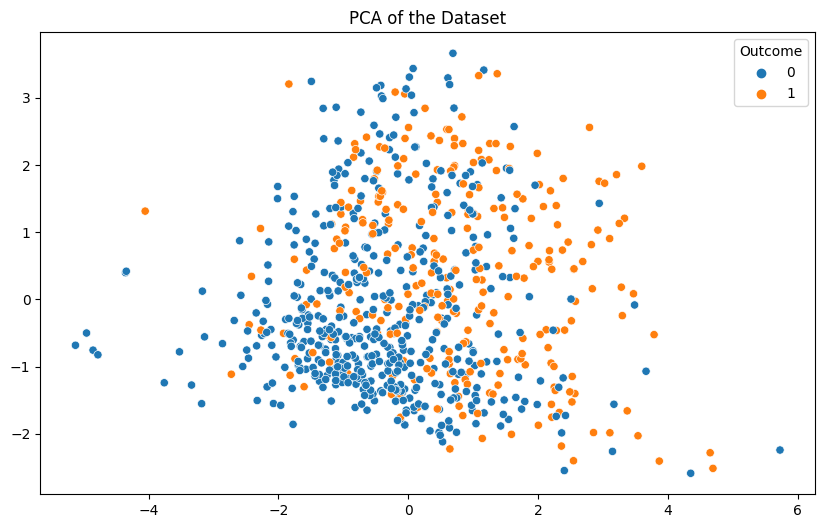

In [165]:
# Visualizing the first two principal components
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y)
plt.title('PCA of the Dataset')
plt.show()

### Implementing K-Means Clustering

In [166]:
from sklearn.cluster import KMeans

In [167]:
# Applying K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

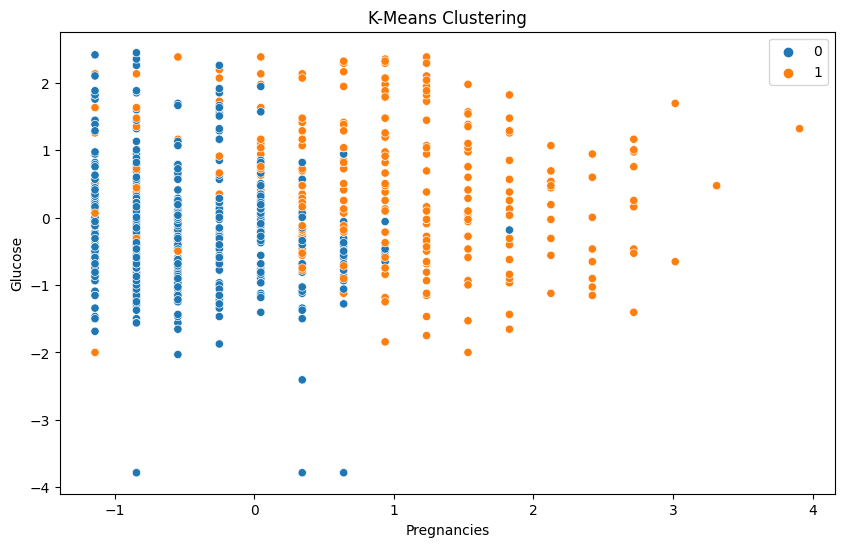

In [168]:
# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=kmeans.labels_)
plt.title('K-Means Clustering')
plt.show()

### Silhouette Score for K-Means Clustering

In [169]:
from sklearn.metrics import silhouette_score

In [170]:
# Calculating Silhouette Score
silhouette_avg = silhouette_score(X, kmeans.labels_)
silhouette_avg

0.1956540901138544

### Implementing DBSCAN Clustering

In [171]:
from sklearn.cluster import DBSCAN

In [172]:
# Applying DBSCAN
dbscan = DBSCAN(eps=3, min_samples=2)
dbscan_labels = dbscan.fit_predict(X)

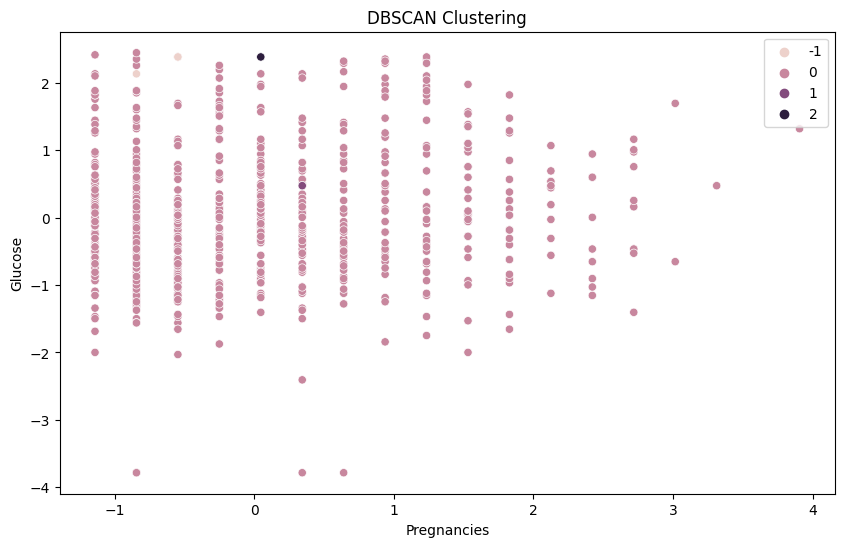

In [173]:
# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=dbscan_labels)
plt.title('DBSCAN Clustering')
plt.show()

### Implementing Gaussian Naive Bayes


In [174]:
from sklearn.naive_bayes import GaussianNB

In [175]:
# Training the model
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

GaussianNB()

In [176]:
# Making predictions
gnb_y_pred = gnb_model.predict(X_test)

In [177]:
# Evaluating the model
gnb_accuracy = accuracy_score(y_test, gnb_y_pred)
gnb_conf_matrix = confusion_matrix(y_test, gnb_y_pred)
gnb_class_report = classification_report(y_test, gnb_y_pred)

gnb_accuracy, gnb_conf_matrix, gnb_class_report

(0.7662337662337663,
 array([[79, 20],
        [16, 39]]),
 '              precision    recall  f1-score   support\n\n           0       0.83      0.80      0.81        99\n           1       0.66      0.71      0.68        55\n\n    accuracy                           0.77       154\n   macro avg       0.75      0.75      0.75       154\nweighted avg       0.77      0.77      0.77       154\n')

### Implementing Logistic Regression with L1 Regularization

In [178]:
# Logistic Regression with L1 Regularization
l1_model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
l1_model.fit(X_train, y_train)

LogisticRegression(penalty='l1', random_state=42, solver='liblinear')

In [179]:
# Making predictions
l1_y_pred = l1_model.predict(X_test)

In [180]:
# Evaluating the model
l1_accuracy = accuracy_score(y_test, l1_y_pred)
l1_conf_matrix = confusion_matrix(y_test, l1_y_pred)
l1_class_report = classification_report(y_test, l1_y_pred)

l1_accuracy, l1_conf_matrix, l1_class_report

(0.7467532467532467,
 array([[78, 21],
        [18, 37]]),
 '              precision    recall  f1-score   support\n\n           0       0.81      0.79      0.80        99\n           1       0.64      0.67      0.65        55\n\n    accuracy                           0.75       154\n   macro avg       0.73      0.73      0.73       154\nweighted avg       0.75      0.75      0.75       154\n')

### Implementing Logistic Regression with L2 Regularization

In [181]:
# Logistic Regression with L2 Regularization
l2_model = LogisticRegression(penalty='l2', solver='liblinear', random_state=42)
l2_model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [182]:
# Making predictions
l2_y_pred = l2_model.predict(X_test)

In [183]:
# Evaluating the model
l2_accuracy = accuracy_score(y_test, l2_y_pred)
l2_conf_matrix = confusion_matrix(y_test, l2_y_pred)
l2_class_report = classification_report(y_test, l2_y_pred)

l2_accuracy, l2_conf_matrix, l2_class_report

(0.7532467532467533,
 array([[79, 20],
        [18, 37]]),
 '              precision    recall  f1-score   support\n\n           0       0.81      0.80      0.81        99\n           1       0.65      0.67      0.66        55\n\n    accuracy                           0.75       154\n   macro avg       0.73      0.74      0.73       154\nweighted avg       0.76      0.75      0.75       154\n')

### Implementing Elastic Net Regularization

In [184]:
from sklearn.linear_model import ElasticNet

In [185]:
# Training the model
en_model = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)
en_model.fit(X_train, y_train)

ElasticNet(random_state=42)

In [186]:
# Making predictions
en_y_pred = en_model.predict(X_test)

In [187]:
# Evaluating the model
from sklearn.metrics import mean_squared_error
en_mse = mean_squared_error(y_test, en_y_pred)
en_rmse = np.sqrt(en_mse)
en_rmse

0.4792667727362263

### Implementing Ridge Regression

In [188]:
from sklearn.linear_model import Ridge

In [189]:
# Training the model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

Ridge()

In [190]:
# Making predictions
ridge_y_pred = ridge_model.predict(X_test)

In [191]:
# Evaluating the model
ridge_mse = mean_squared_error(y_test, ridge_y_pred)
ridge_rmse = np.sqrt(ridge_mse)
ridge_rmse

0.413525502190152

### Implementing Lasso Regression

In [192]:
from sklearn.linear_model import Lasso

In [193]:
# Training the model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.1)

In [194]:
# Making predictions
lasso_y_pred = lasso_model.predict(X_test)

In [195]:
# Evaluating the model
lasso_mse = mean_squared_error(y_test, lasso_y_pred)
lasso_rmse = np.sqrt(lasso_mse)
lasso_rmse

0.42932813594489283

[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.6s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=200; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=300; total time=   0.4s
[CV] END ..learning_rate=0.01, max_depth=7, n_estimators=300; total time=   0.4s
[CV] END ..learning_rate=0.01, max_depth=7, n_estimators=300; total time=   0.4s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=200; total time=   0.2s
[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=200; total time=   0.2s
[CV] EN